
Потренируем навыки, полученные на практическом занятии.

Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.

Данные вы сможете получить исполнив следующий код:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()[‘filename’], skiprows=1)

Переменная, которую надо предсказать - ’MEDV’.

Прочитать информацию о содержимом датасета:
print(load_boston()[‘DESCR’])

Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv',  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [13]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


#нет пустых значений. Уже хорошо

In [15]:
corr = data.corr()
corr = corr.round(2)
corr.style.background_gradient()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.2,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1,0.06,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.06,-0.04,0.06,1,0.09,0.09,0.09,-0.1,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.1,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.63,-0.31,0.6,-0.01,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


целевая функция имеет сильную корреляцию от LSTAT и RM

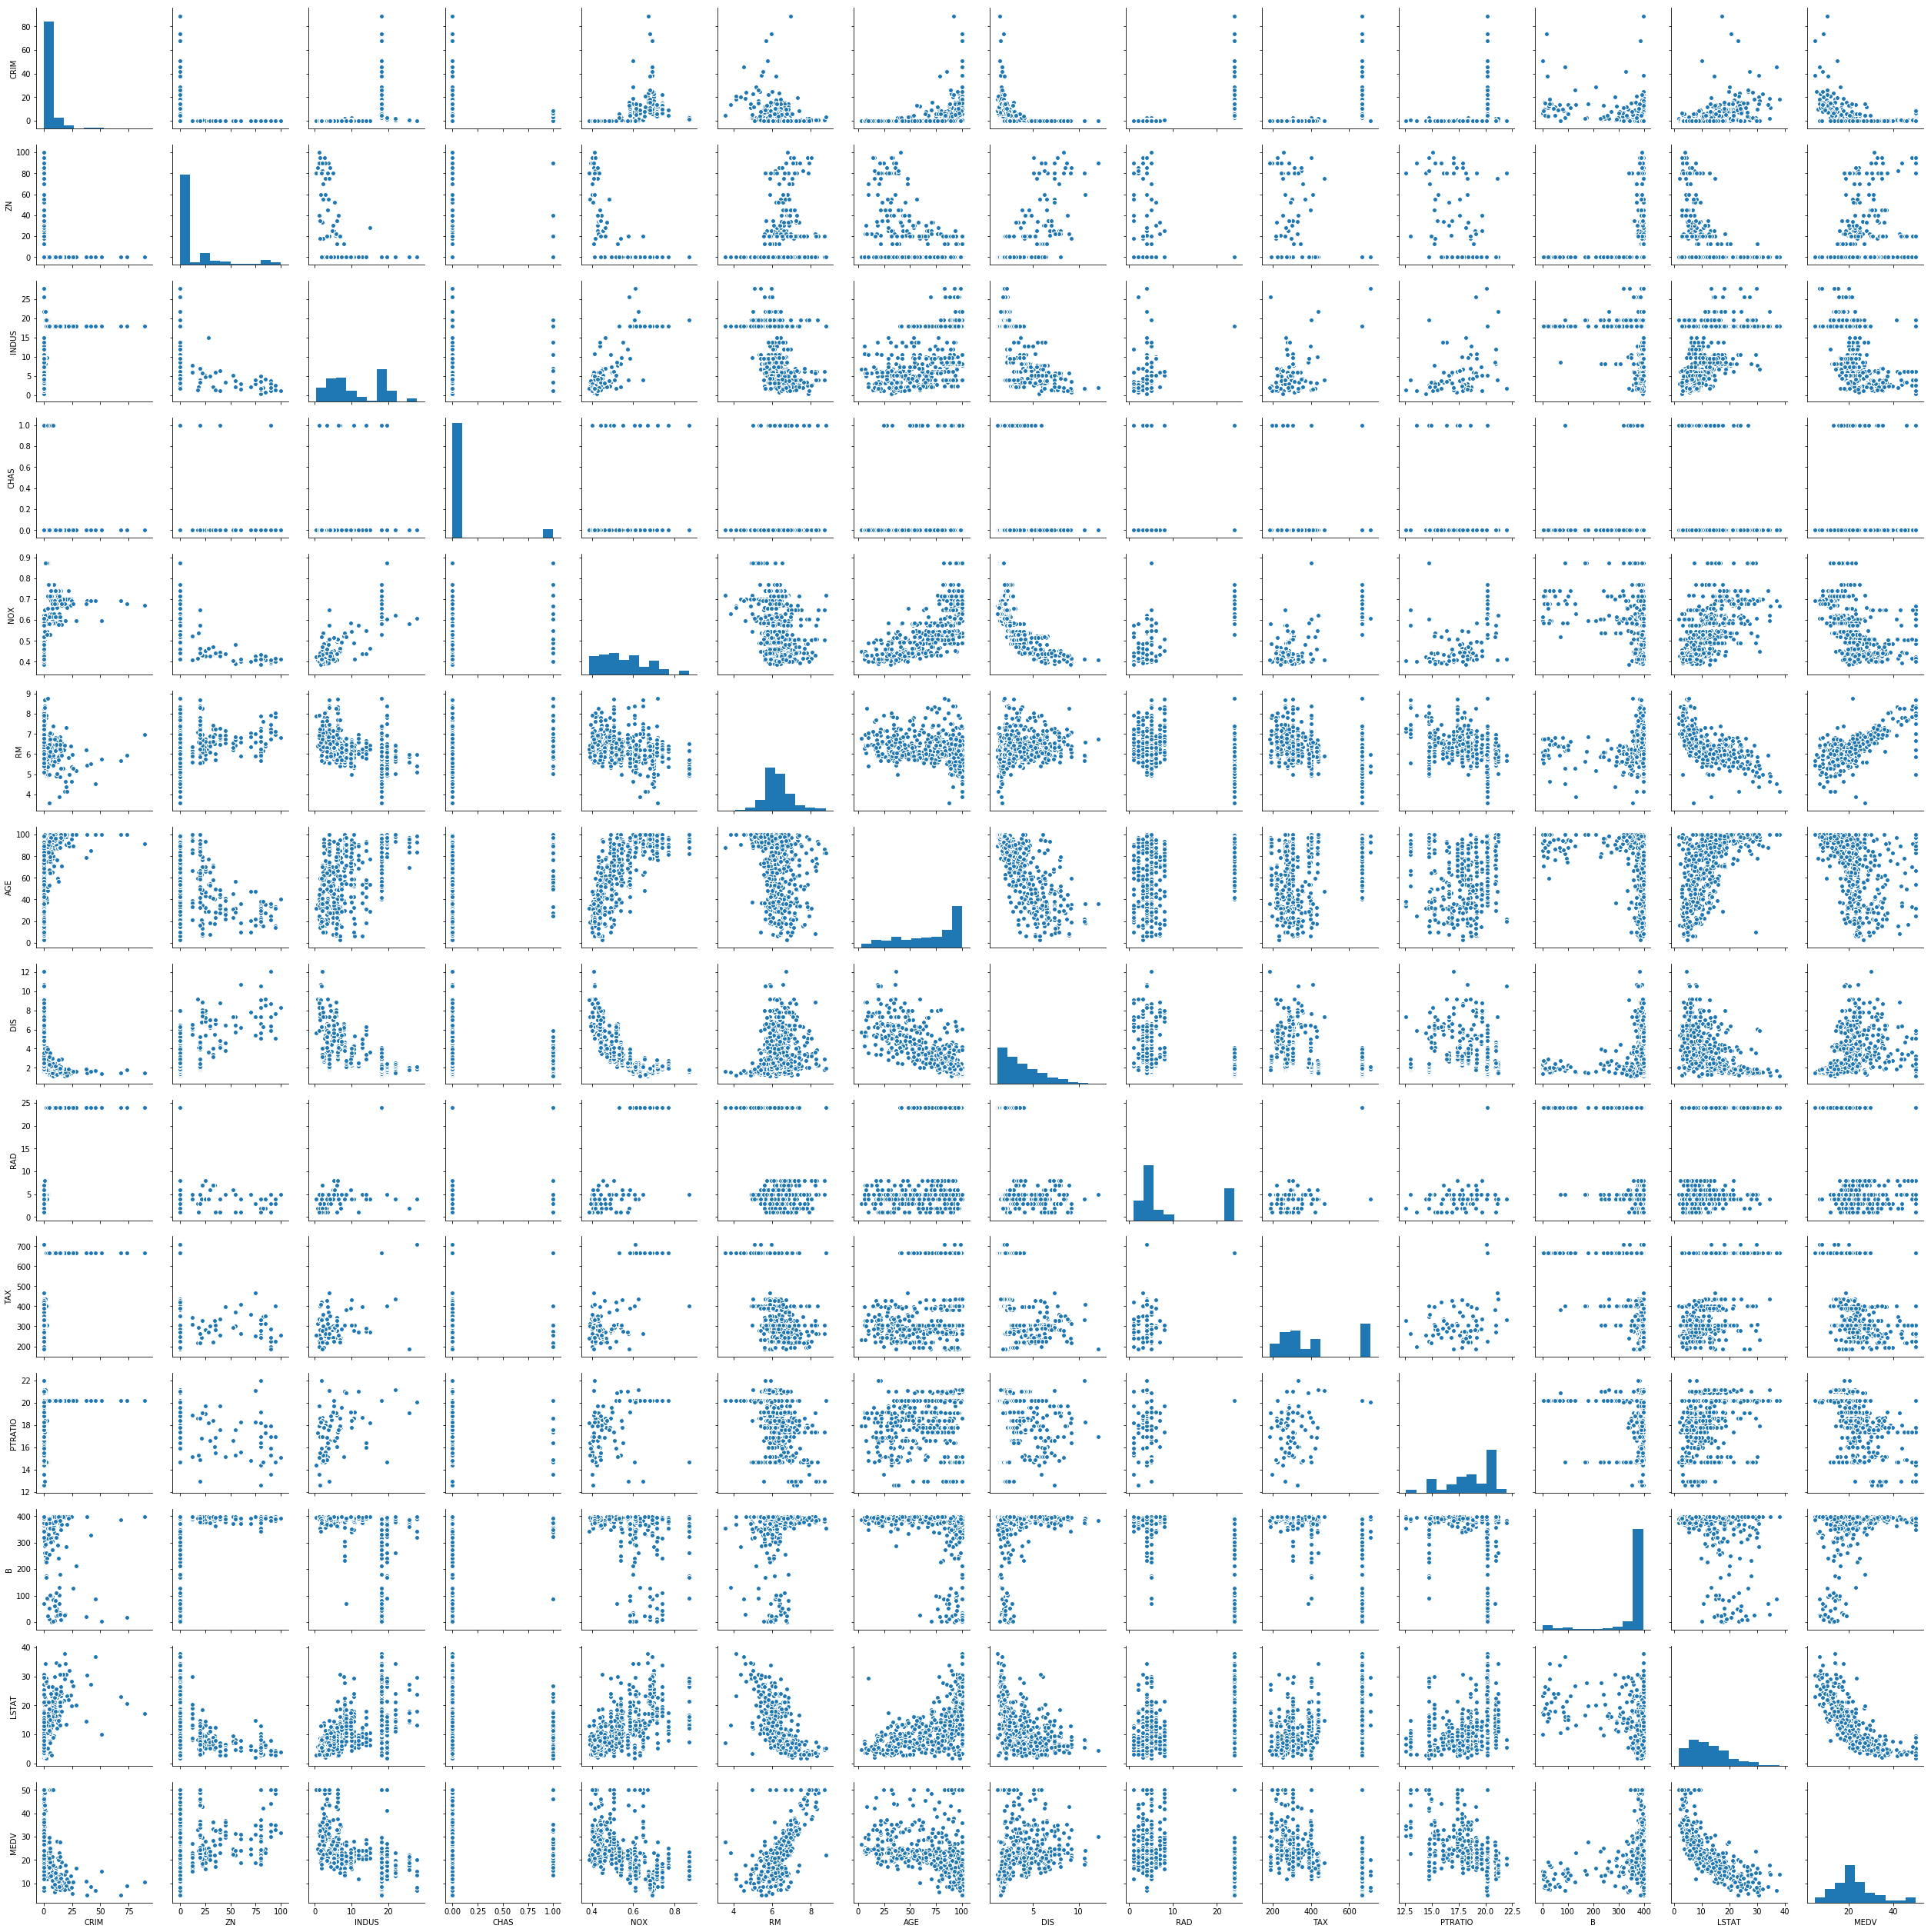

In [16]:
sns.pairplot(data)
#посмотрим распределеяния

In [ ]:
#кол-во данных для моделей много. Попробуем по ним построить модель и проверить ошибку

In [19]:
from sklearn.metrics import mean_absolute_error

X = X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = data[['MEDV']]
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
  -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
   3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
  -5.24758378e-01]]
Bias: [36.45948839]
Error: 3.2708628109003195


#Типа ошибка даже 3, вроде не плохо. Но посмотрим среднее от целевой функции

In [21]:
data.MEDV.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [22]:
#а вот от средней очень большое отклонение, как и от  медианы смотрим дальше
#уменьшим кол-во переменных оставив только 2 по которым самая большая корреляция


In [23]:
X = X = data[['RM', 'LSTAT']]
y = data[['MEDV']]
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [[ 5.09478798 -0.64235833]]
Bias: [-1.35827281]
Error: 3.952580067119271


In [24]:
#ошибка даже выросла. Тут точно что то не то
#Попробуе5м посмотреть отдельно по 1 переменной

In [25]:
X = X = data[['LSTAT']]
y = data[['MEDV']]
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [[-0.95004935]]
Bias: [34.55384088]
Error: 4.505281166250568


In [ ]:
#Все стало еще хуже. ПРовекрим другую

In [26]:
X = X = data[['RM']]
y = data[['MEDV']]
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [[9.10210898]]
Bias: [-34.67062078]
Error: 4.4477729015322325


In [27]:
# Мда. с 2 переменными и со всеми даже было лучше...
#пока лучший результат это линейная регрессия от всех переменных


In [31]:
# А если полиному?
from sklearn.preprocessing import PolynomialFeatures
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = data[['MEDV']]


poly_reg = PolynomialFeatures(degree=2)#степень

X_poly = poly_reg.fit_transform(X) #переобразовываем наши данные в поли

reg = LinearRegression().fit(X_poly, y)
#print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X_poly)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))


Bias: [7.9716208e+08]
Error: 1.9014410311996701


In [ ]:
#Огонь! ошибка упала аж до 1.9
#но тут 100 пудов кросс валидация...

In [ ]:
#построим поли по 1 перемеенной LSTAT

In [32]:
X = data[['LSTAT']]
y = data[['MEDV']]


poly_reg = PolynomialFeatures(degree=2)#степень

X_poly = poly_reg.fit_transform(X) #переобразовываем наши данные в поли

reg = LinearRegression().fit(X_poly, y)
#print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X_poly)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Bias: [42.86200733]
Error: 4.0427500305083015


In [33]:
#Улучшений по сравнению с линейной по всем переменным нету....

In [35]:
#А если так?
X = data[['LSTAT', 'RM']]
y = data[['MEDV']]


poly_reg = PolynomialFeatures(degree=2)#степень

X_poly = poly_reg.fit_transform(X) #переобразовываем наши данные в поли

reg = LinearRegression().fit(X_poly, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X_poly)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [[ 0.00000000e+00  3.71029715e-01 -1.53603971e+01  9.13586658e-03
  -2.31206282e-01  1.72825540e+00]]
Bias: [61.00809098]
Error: 3.124594129414631


In [ ]:
#Это сейчас лучшее!!

In [36]:
#А вот так?
X = data[['RM']]
y = data[['MEDV']]


poly_reg = PolynomialFeatures(degree=2)#степень

X_poly = poly_reg.fit_transform(X) #переобразовываем наши данные в поли

reg = LinearRegression().fit(X_poly, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X_poly)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [[  0.         -22.64326237   2.47012384]]
Bias: [66.05884748]
Error: 4.224455420586542


In [37]:
#Нее

In [38]:
#Лучшее это полинома от 'LSTAT', 'RM'

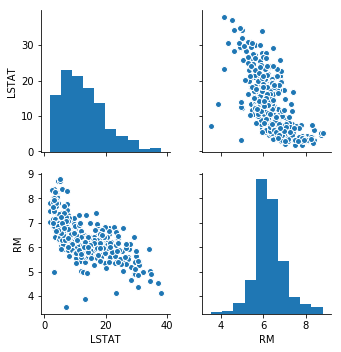

In [40]:
sns.pairplot(data[['LSTAT', 'RM']])

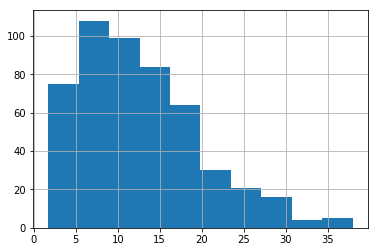

In [41]:
data.LSTAT.hist()

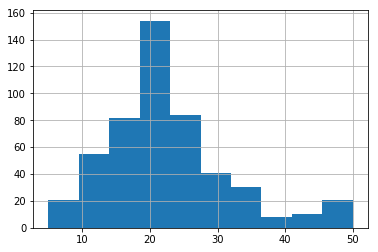

In [45]:
data.MEDV.hist()

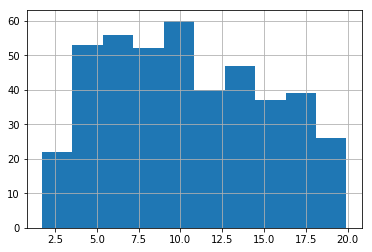

In [44]:
data[data.LSTAT<20].LSTAT.hist()

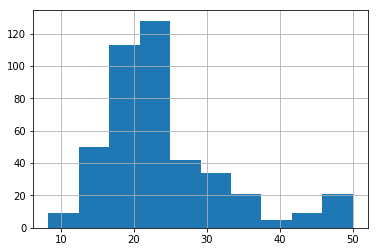

In [46]:
data[data.LSTAT<20].MEDV.hist()

In [47]:
#обрезка данных по LSTAT  - дает нормирование (ну лучше по мне), но MEDV от этого не улучшается..

In [51]:
data[data.LSTAT>20].LSTAT.count()

74

In [52]:
#рырезать при нашей выборки данные нельязя. Очень много....

In [54]:
data[data.LSTAT>20].LSTAT.count()/data.LSTAT.count()

0.14624505928853754

In [57]:
data[data.MEDV>35].MEDV.count()/data.LSTAT.count()

0.09486166007905138

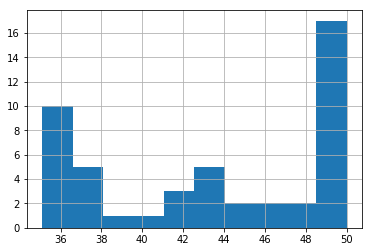

In [59]:
data[data.MEDV>35].MEDV.hist()

In [60]:
#попробуем вот это резануть

In [61]:
data_1 = data[data.MEDV<35]

In [62]:
X = data_1[['LSTAT', 'RM']]
y = data_1[['MEDV']]


poly_reg = PolynomialFeatures(degree=2)#степень

X_poly = poly_reg.fit_transform(X) #переобразовываем наши данные в поли

reg = LinearRegression().fit(X_poly, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X_poly)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [[ 0.          0.75730568 -1.29577681  0.00250966 -0.24786655  0.52140395]]
Bias: [17.61057842]
Error: 2.644414379896921


In [63]:
#похоже что это самое лучшее! полином второй степени от 2х переменных, с учетом отсечения 10% данных которые я признав выбросами


In [64]:
#Можно еще порыть - нормировать, центровать, но мне кажется тут суть закрпеления значений, вроде думаю я этого добился